In [1]:
from matplotlib import pyplot as plt
import numpy as np
import win32com.client
speaker = win32com.client.Dispatch("SAPI.SpVoice")

In [2]:
#each point is length, width, type (0, 1)

data = [[3   , 1.5 , 1 ],
        [2   , 1   , 0 ], 
        [4   , 1.5 , 1 ],
        [3   , 1   , 0 ], 
        [3.5 , .5  , 1 ],
        [2   , .5  , 0 ],
        [5.5 , 1   , 1 ],
        [1   , 1   , 0 ]]

mystery_flower = [4.5 , 1]

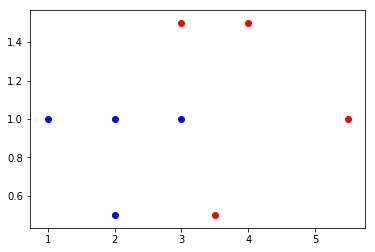

In [3]:
for i in range(len(data)):
    point = data[i]
    color = "r"
    if point[2] == 0:
        color = "b"
    plt.scatter(point[0], point[1], c = color)

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x)* (1-sigmoid(x))

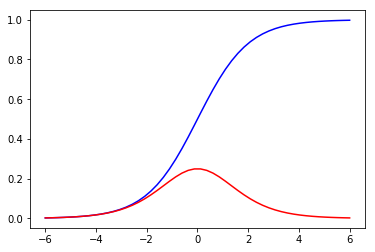

In [5]:
T = np.linspace(-6,6)
plt.plot(T, sigmoid(T), c = 'b')
plt.plot(T, sigmoid_p(T), c ='r')

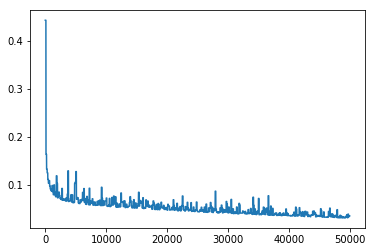

In [6]:
learning_rate = 0.2

costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()


for i in range(50000):
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = w1*point[0] + w2*point[1] + b
    pred = sigmoid(z)
    target = point[2]
    cost = np.square(pred - target)
    
    dcost_dpred = 2 * (pred - target)
    dpred_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db  = 1
    
    dcost_dw1 = dcost_dpred * dpred_dz * dz_dw1
    dcost_dw2 = dcost_dpred * dpred_dz * dz_dw2
    dcost_db  = dcost_dpred * dpred_dz * dz_db

    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b  = b  - learning_rate * dcost_db
    
    
    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[j]
            
            z = w1*point[0] + w2*point[1] + b
            pred = sigmoid(z)
            target = point[2]
            cost = np.square(pred - target)
            
            cost_sum = cost_sum + cost
                     
    costs.append(cost_sum / len(data))        
            
    

plt.plot(costs)


In [7]:
for i in range(len(data)):
    point = data[i]
    
    z = w1*point[0] + w2*point[1] + b
    pred = sigmoid(z)
    print(point)
    print(pred)


[3, 1.5, 1]
0.7472799488590679
[2, 1, 0]
0.0006119302856869038
[4, 1.5, 1]
0.9996312105457176
[3, 1, 0]
0.3595030281914579
[3.5, 0.5, 1]
0.763357885174289
[2, 0.5, 0]
0.00011621418920039584
[5.5, 1, 1]
0.9999999299722317
[1, 1, 0]
6.67959009572878e-07


In [12]:
mystery_flower = [4.5 , 1]

z = w1*mystery_flower[0] + w2*mystery_flower[1] + b
pred = sigmoid(z)


if pred > 0.5:
    speaker.Speak("Red")
    
else:
    speaker.Speak("Blue")